In [4]:
# standard libraries
import math, os, time, sys
import numpy as np
from datetime import datetime

# plotting
import matplotlib.pyplot as plt

# progress bars
from tqdm.notebook import trange, tqdm

# PyTorch
import torch

from IPython.display import clear_output # for animating the plot

#modules_path = os.path.abspath('../Main')
#sys.path.append(modules_path)

#from Train_v2 import *
#from Visualisation import *

from Main import Train_v2
from Main import Visualisation

In [ ]:
os.path.abspath('./Figures')

'c:\\Users\\20183003\\Desktop\\Figures'

In [6]:
# Handy line for using a CUDA device if available but default to the CPU if not
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Random initizalization using SGD

900 Training Loss: tensor(0.0698, device='cuda:0')


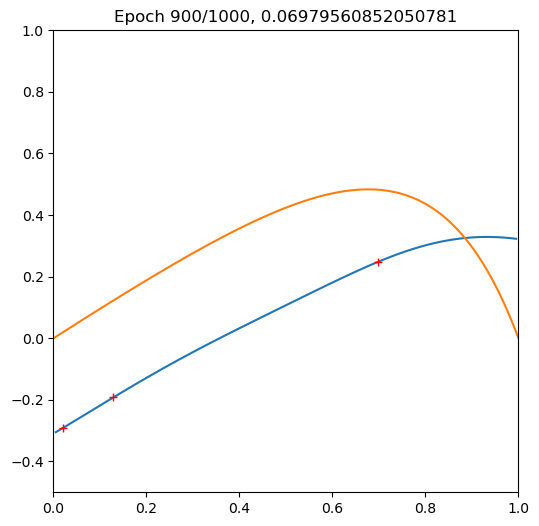

In [7]:
Result = Train_v2.train_network(LR=0.1, 
                                HIDDEN=3, 
                                NR_EPOCHS=1000, 
                                h_SAMPLE=0.01, 
                                LAMBDA=1/2,
                                PLOT_INTERVAL=100,
                                EPSIL=0.2, 
                                Initializer=Train_v2.initializeNetwork, 
                                optim='SGD',
                                momentum=0.95)

Acces the loss

In [24]:
print(Result.loss)

0.06391798


Print the final parameters

In [26]:
print(Result.w_list[-3:])
print(Result.a_list[-3:])
print(Result.b_list[-3:])

[-0.54168034 -1.60662997  2.58274961]
[ 4.39057112 -1.92953539  0.63612765]
[ 0.08848391  0.03669621 -1.85407972]


Plot the evolution of the parameters and de inflection points and the loss

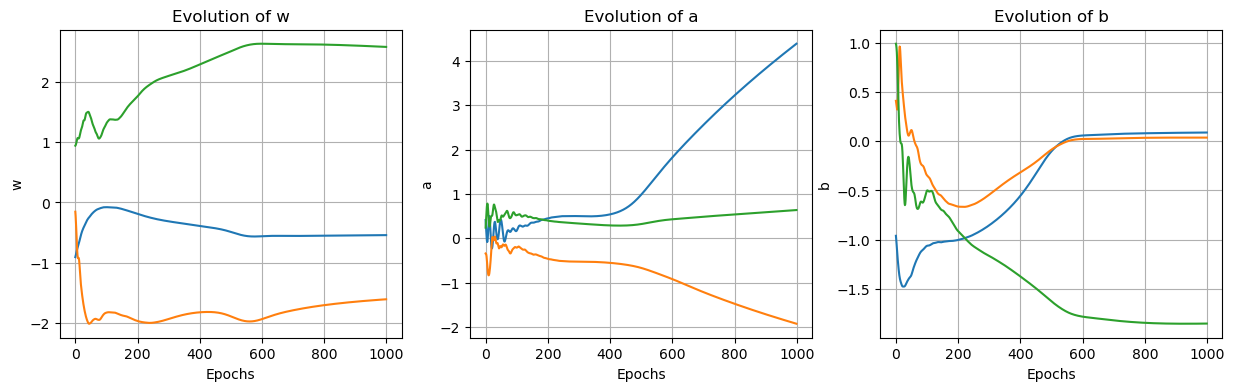

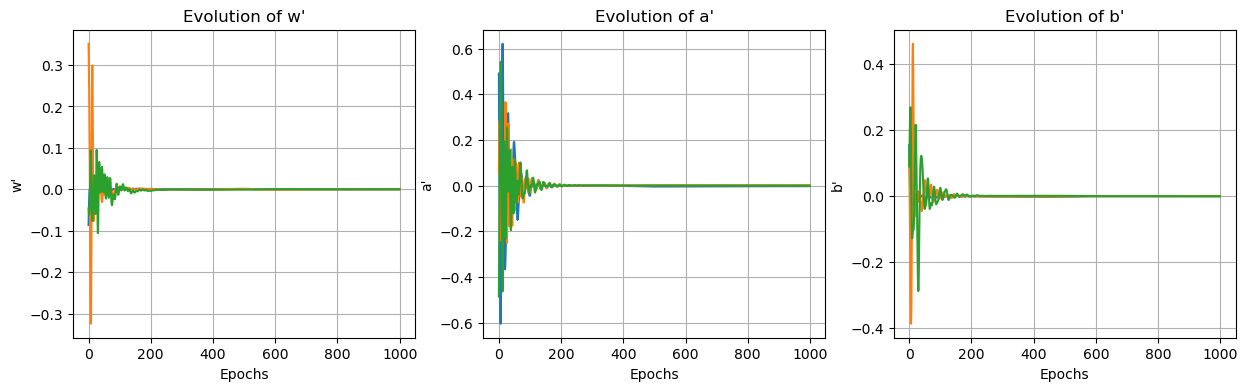

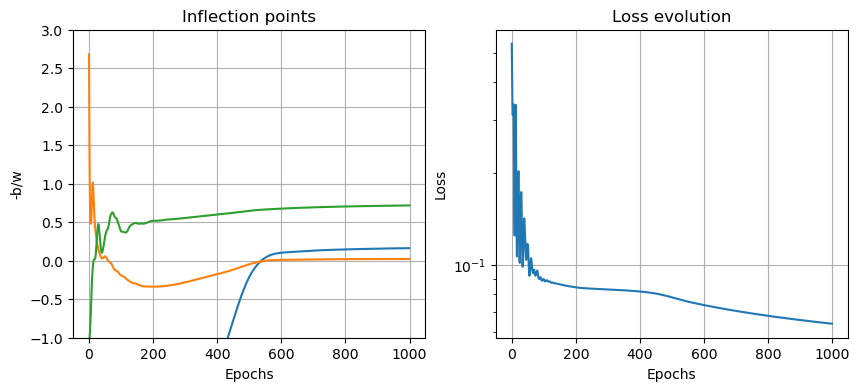

In [27]:
Result.evol_plot()
Result.evol_plot_grad()
Result.loss_infl_plots()

Initialize using last value of the previous experiment, and train using BFGS

In [28]:
w = torch.tensor([[Result.w_list[-1]],[Result.w_list[-2]],[Result.w_list[-3]]]).to(device)
w = w.float()
a = torch.tensor([[Result.a_list[-1],Result.a_list[-2],Result.a_list[-3]]]).to(device)
a = a.float()
b = torch.tensor([Result.b_list[-1],Result.b_list[-2],Result.b_list[-3]]).to(device)
b = b.float()

19 Training Loss: tensor(0.0026, device='cuda:0')


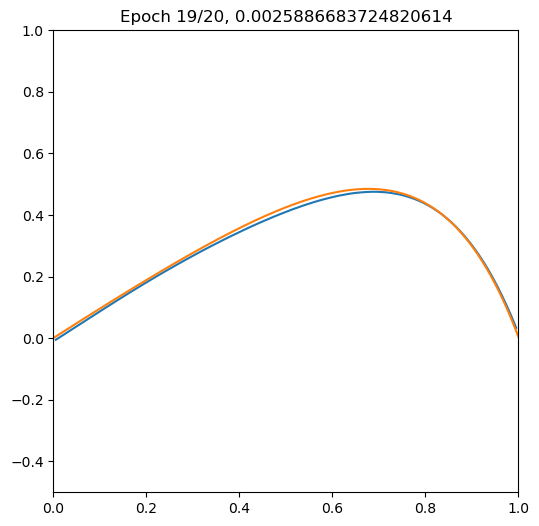

In [29]:
Result2=Train_v2.train_network(LR=0.1, 
                      HIDDEN=3,
                      NR_EPOCHS=20, 
                      h_SAMPLE=0.01, 
                      LAMBDA=1/2,
                      PLOT_INTERVAL=1,
                      EPSIL=0.2, 
                      Initializer=Train_v2.initializeNetwork_guess,
                      optim='LBFGS', 
                      params=[w,a,b])

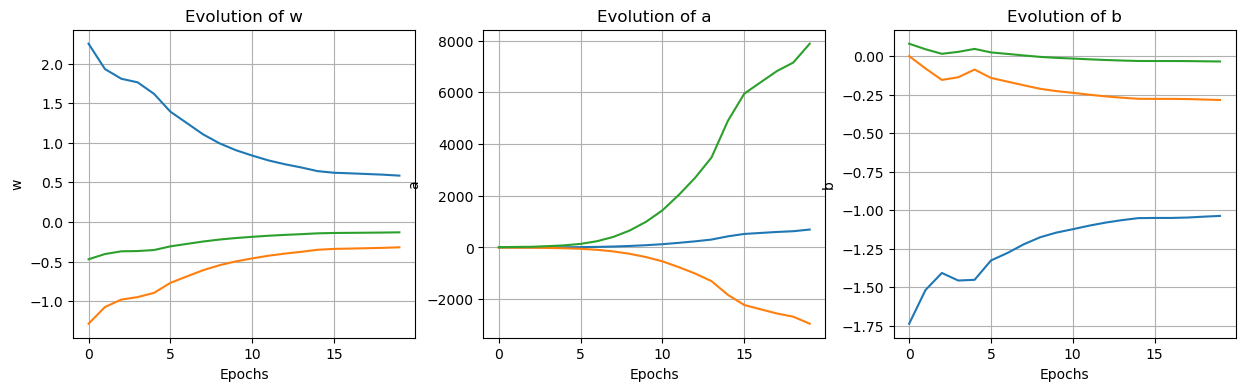

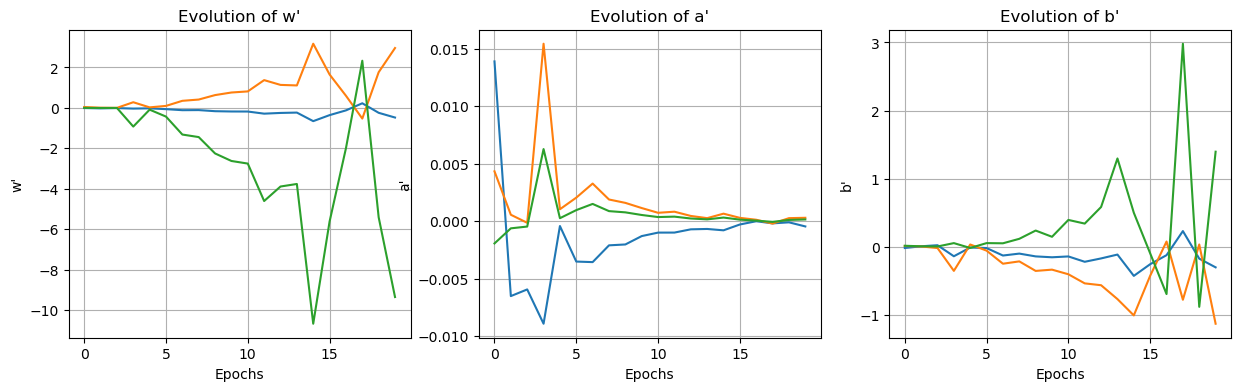

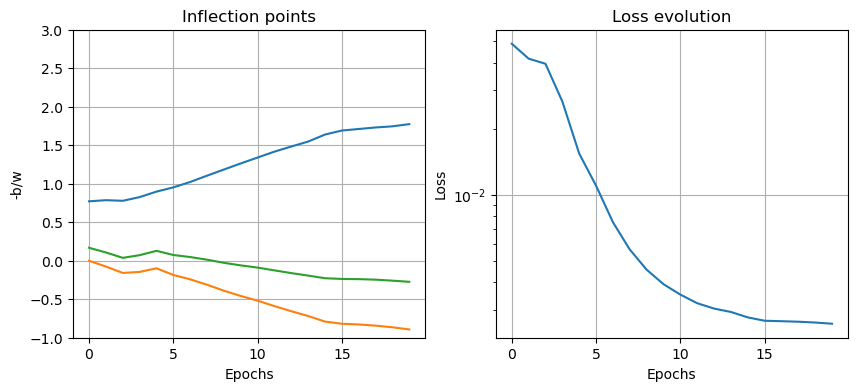

In [31]:
Result2.evol_plot()
Result2.evol_plot_grad()
Result2.loss_infl_plots()